 COMPREHENSIVE STABLECOIN STABILITY ANALYSIS

 Fetching data for USDT (Tether)...
    Trying 12data with symbol: USDT/USD
 12data success: 365 records
   Successfully obtained 365 days of data for USDT
   Price range: $0.9979 - $1.0016
   Date range: 2024-10-06 to 2025-10-05


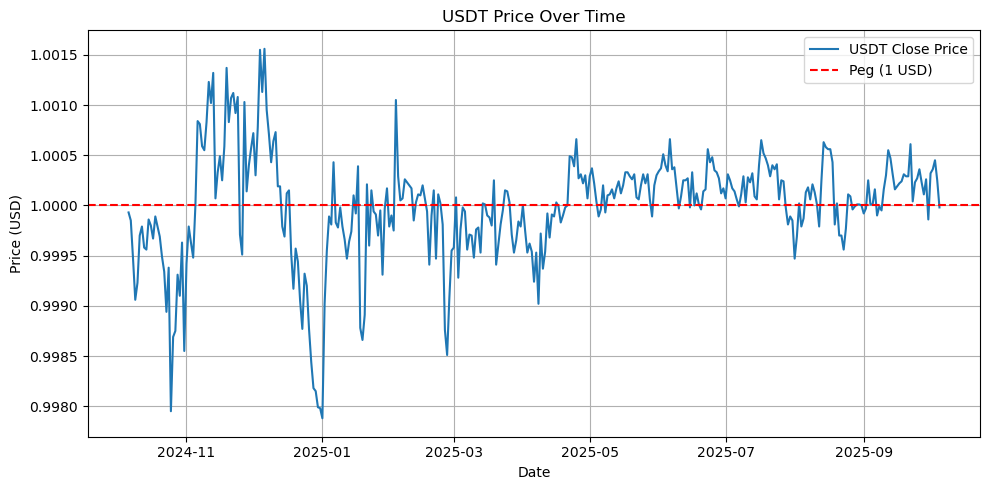


 Fetching data for USDC (USD Coin)...
    Trying 12data with symbol: USDC/USD
 12data success: 365 records
   Successfully obtained 365 days of data for USDC
   Price range: $0.9983 - $1.0021
   Date range: 2024-10-06 to 2025-10-05


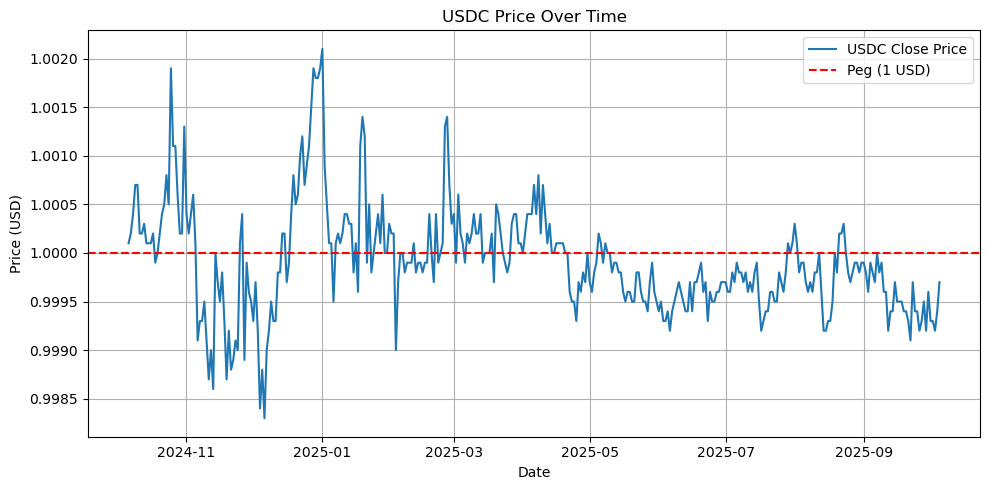


 Fetching data for DAI (Dai)...
    Trying 12data with symbol: DAI/USD
 12data success: 365 records
   Successfully obtained 365 days of data for DAI
   Price range: $0.9996 - $1.0004
   Date range: 2024-10-06 to 2025-10-05


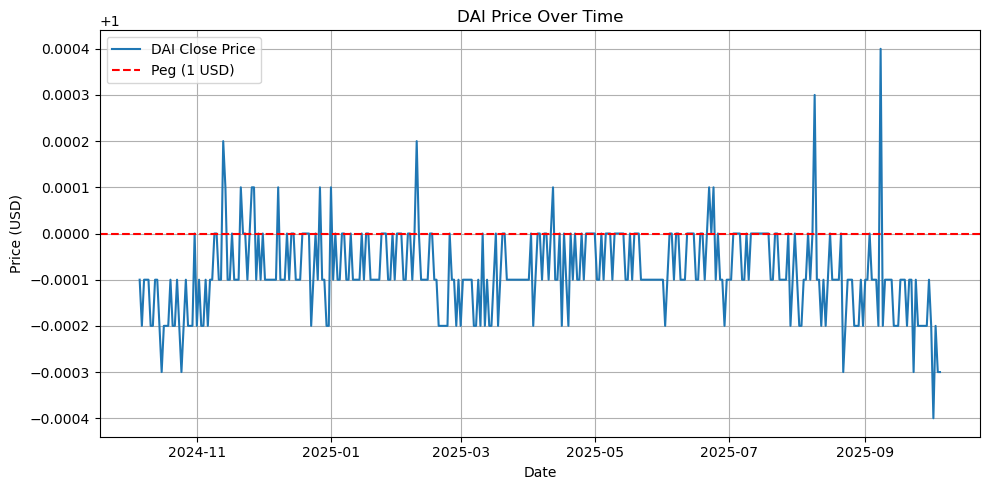


 Fetching data for BUSD (Binance USD)...
    Trying 12data with symbol: BUSD/USD
    Trying 12data with symbol: BUSDUSD
    Trying 12data with symbol: BUSD-USD
   12data failed, trying Yahoo Finance...
    Trying Yahoo Finance with symbol: BUSD-USD
  Yahoo Finance success: 366 records
   Successfully obtained 366 days of data for BUSD
   Price range: $0.9992 - $1.0904
   Date range: 2024-10-05 to 2025-10-05


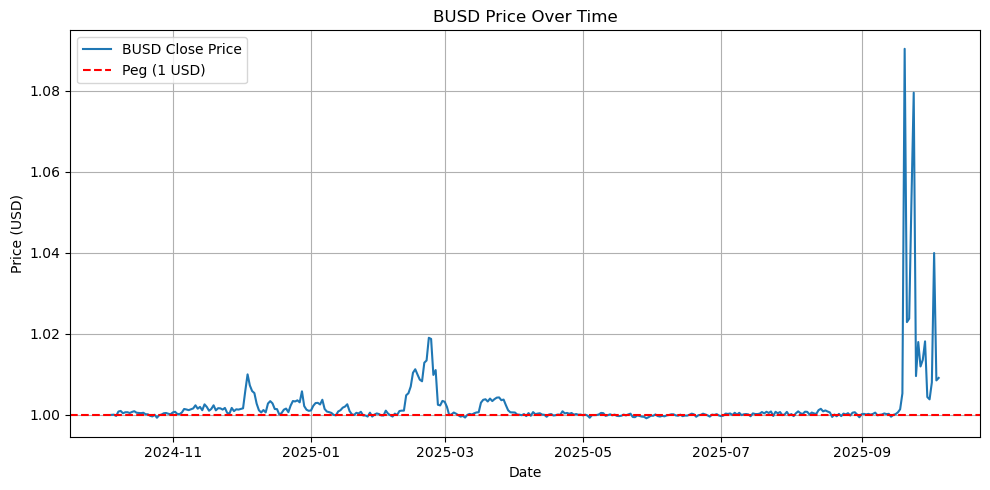


 Fetching data for FRAX (Frax)...
    Trying 12data with symbol: FRAX/USD
 12data success: 365 records
   Successfully obtained 365 days of data for FRAX
   Price range: $0.9945 - $1.0004
   Date range: 2024-08-11 to 2025-10-05


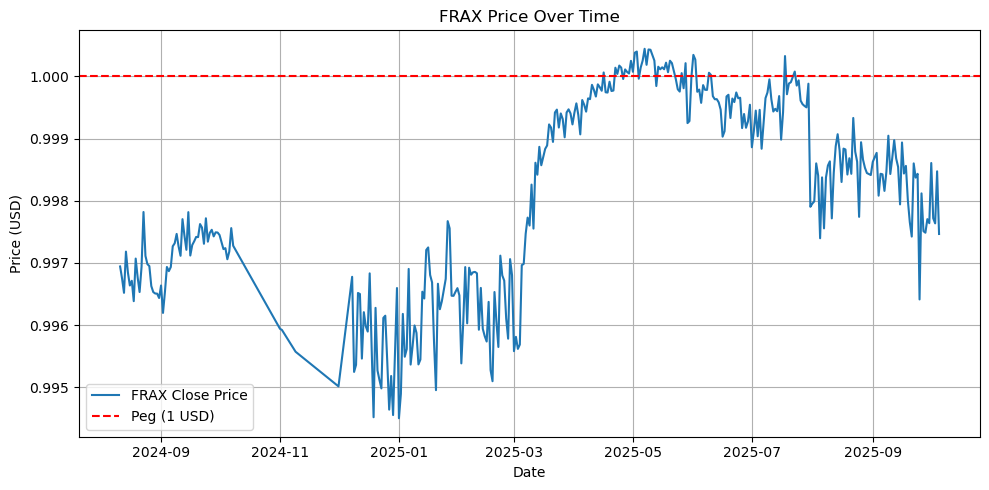


 Successfully analyzed 5/5 stablecoins

1. PRICE STABILITY PERFORMANCE INDEX (PSPI)
------------------------------------------------------------
USDT   (Type 1): PSPI = 0.010629
         Avg Dev = 0.000378, Max DD = 0.002120
USDC   (Type 1): PSPI = 0.010564
         Avg Dev = 0.000421, Max DD = 0.001700
DAI    (Type 2): PSPI = 0.010127
         Avg Dev = 0.000094, Max DD = 0.000400
BUSD   (Type 1): PSPI = 0.057182
         Avg Dev = 0.002357, Max DD = 0.000830
FRAX   (Type 4): PSPI = 0.012045
         Avg Dev = 0.001971, Max DD = 0.005498

STABILITY RANKING :
  1. DAI (Crypto): 0.010127
  2. USDC (Fiat): 0.010564
  3. USDT (Fiat): 0.010629
  4. FRAX (Hybrid): 0.012045
  5. BUSD (Fiat): 0.057182


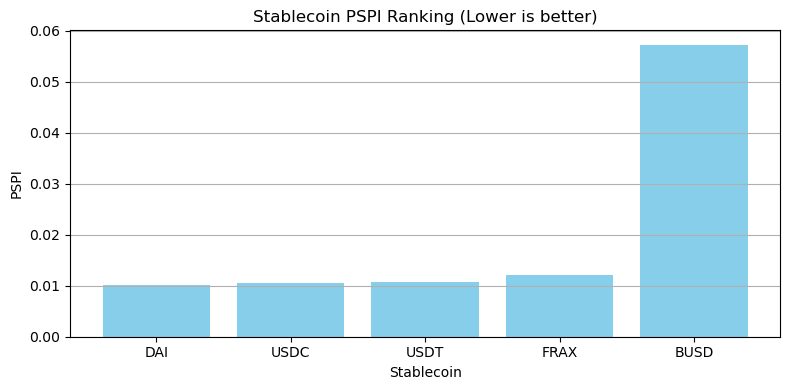


2. VOLATILITY ANALYSIS
------------------------------------------------------------
USDT  : Ann. Vol = 0.0056, VaR95 = 0.000540
USDC  : Ann. Vol = 0.0056, VaR95 = 0.000500
DAI   : Ann. Vol = 0.0017, VaR95 = 0.000200
BUSD  : Ann. Vol = 0.1157, VaR95 = 0.001299
FRAX  : Ann. Vol = 0.0088, VaR95 = 0.000918


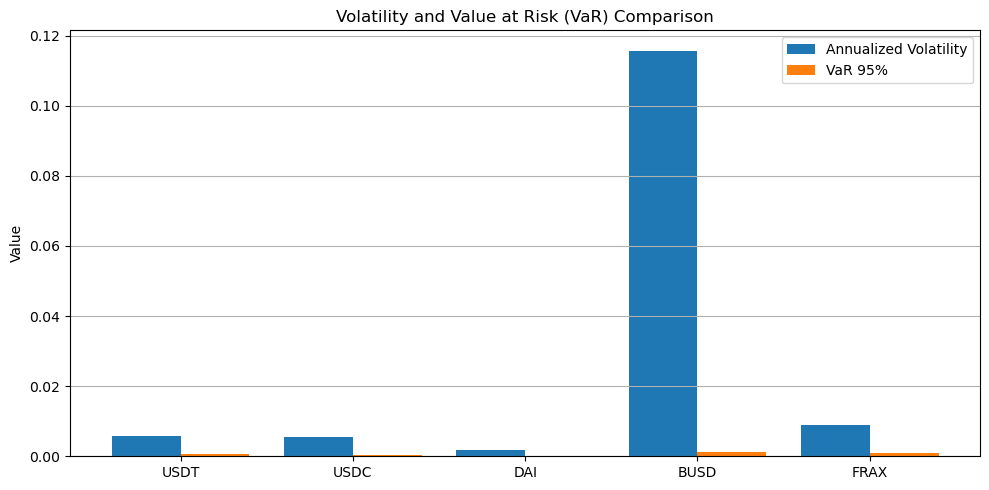


3. CORRELATION ANALYSIS
------------------------------------------------------------

 Analyzing correlations between stablecoins...
  Correlation analysis based on 308 common observations


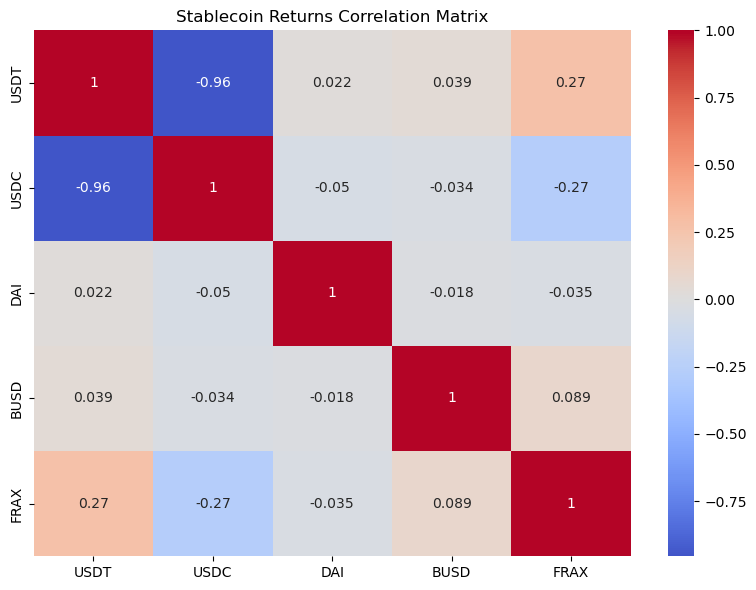

Correlation Matrix:
        USDT    USDC     DAI    BUSD    FRAX
USDT  1.0000 -0.9553  0.0223  0.0394  0.2742
USDC -0.9553  1.0000 -0.0504 -0.0342 -0.2736
DAI   0.0223 -0.0504  1.0000 -0.0180 -0.0353
BUSD  0.0394 -0.0342 -0.0180  1.0000  0.0890
FRAX  0.2742 -0.2736 -0.0353  0.0890  1.0000

Average Correlations:
  USDT  : -0.1549
  USDC  : -0.3284
  DAI   : -0.0203
  BUSD  : 0.0191
  FRAX  : 0.0136

4. REDUCED REGRESSION ANALYSIS
------------------------------------------------------------
 Dataset for regression (reduced predictors):
  symbol      pspi   stc_vol  avg_deviation
0   USDT  0.010629  0.005643       0.000378
1   USDC  0.010564  0.005588       0.000421
2    DAI  0.010127  0.001675       0.000094
3   BUSD  0.057182  0.115694       0.002357
4   FRAX  0.012045  0.008781       0.001971

REDUCED MODEL (finite std error):
                            OLS Regression Results                            
Dep. Variable:                   pspi   R-squared:                       1.000
Mod

In [1]:
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm
from arch import arch_model
import yfinance as yf
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# --- API Configuration ---
TWELVE_API_KEY = 'ed056fe87ebe4aa28d6e0c16257bf21e'

# --- Stablecoin Metadata ---
STABLECOINS = {
    'USDT': {
        'symbol': 'USDT',
        'name': 'Tether',
        'mech_type': 1,
        'age_months': 120,
        'twelve_symbols': ['USDT/USD', 'USDTUSD', 'USDT-USD'],
        'yahoo_symbols': ['USDT-USD', 'USDTUSD=X']
    },
    'USDC': {
        'symbol': 'USDC',
        'name': 'USD Coin',
        'mech_type': 1,
        'age_months': 72,
        'twelve_symbols': ['USDC/USD', 'USDCUSD', 'USDC-USD'],
        'yahoo_symbols': ['USDC-USD', 'USDCUSD=X']
    },
    'DAI': {
        'symbol': 'DAI',
        'name': 'Dai',
        'mech_type': 2,
        'age_months': 84,
        'twelve_symbols': ['DAI/USD', 'DAIUSD', 'DAI-USD'],
        'yahoo_symbols': ['DAI-USD', 'DAIUSD=X']
    },
    'BUSD': {
        'symbol': 'BUSD',
        'name': 'Binance USD',
        'mech_type': 1,
        'age_months': 60,
        'twelve_symbols': ['BUSD/USD', 'BUSDUSD', 'BUSD-USD'],
        'yahoo_symbols': ['BUSD-USD', 'BUSDUSD=X']
    },
    'FRAX': {
        'symbol': 'FRAX',
        'name': 'Frax',
        'mech_type': 4,
        'age_months': 48,
        'twelve_symbols': ['FRAX/USD', 'FRAXUSD', 'FRAX-USD'],
        'yahoo_symbols': ['FRAX-USD', 'FRAXUSD=X']
    }
}

def fetch_12data_price(symbols_list, periods=365):
    for symbol in symbols_list:
        try:
            print(f"    Trying 12data with symbol: {symbol}")
            url = "https://api.twelvedata.com/time_series"
            params = {
                "symbol": symbol,
                "interval": "1day",
                "outputsize": periods,
                "apikey": TWELVE_API_KEY
            }
            response = requests.get(url, params=params, timeout=15)
            data = response.json()
            if 'values' in data and len(data['values']) > 0:
                df = pd.DataFrame(data['values'])
                df['datetime'] = pd.to_datetime(df['datetime'])
                price_cols = ['close', 'Close', 'price', 'Price']
                price_col = next((col for col in price_cols if col in df.columns), None)
                if price_col is None:
                    continue
                df['close'] = pd.to_numeric(df[price_col], errors='coerce')
                for col in ['high', 'low', 'open', 'volume']:
                    if col in df.columns:
                        df[col] = pd.to_numeric(df[col], errors='coerce')
                    else:
                        df[col] = df['close'] if col != 'volume' else 1000000
                df = df.sort_values('datetime').reset_index(drop=True)
                df = df.dropna(subset=['close'])
                if len(df) > 30:
                    df['returns'] = df['close'].pct_change()
                    df['log_returns'] = np.log(df['close'] / df['close'].shift(1))
                    print(f" 12data success: {len(df)} records")
                    return df
        except Exception as e:
            print(f"    12data exception for {symbol}: {str(e)}")
            continue
    return pd.DataFrame()

def fetch_yahoo_finance_price(symbols_list, period="1y"):
    for symbol in symbols_list:
        try:
            print(f"    Trying Yahoo Finance with symbol: {symbol}")
            ticker = yf.Ticker(symbol)
            hist = ticker.history(period=period)
            if len(hist) > 30:
                df = hist.reset_index()
                df.columns = [col.lower() for col in df.columns]
                df = df.rename(columns={'date': 'datetime', 'adj close': 'close', 'adjclose': 'close'})
                required_cols = ['datetime', 'close']
                if all(col in df.columns for col in required_cols):
                    for col in ['open', 'high', 'low']:
                        if col not in df.columns:
                            df[col] = df['close']
                    if 'volume' not in df.columns:
                        df['volume'] = 1000000
                    df = df.sort_values('datetime').reset_index(drop=True)
                    df['returns'] = df['close'].pct_change()
                    df['log_returns'] = np.log(df['close'] / df['close'].shift(1))
                    print(f"  Yahoo Finance success: {len(df)} records")
                    return df
        except Exception as e:
            print(f"    Yahoo Finance exception for {symbol}: {str(e)}")
            continue
    return pd.DataFrame()

def get_stablecoin_data(coin_config):
    symbol = coin_config['symbol']
    print(f"\n Fetching data for {symbol} ({coin_config['name']})...")
    df = fetch_12data_price(coin_config['twelve_symbols'])
    if df.empty:
        print(f"   12data failed, trying Yahoo Finance...")
        df = fetch_yahoo_finance_price(coin_config['yahoo_symbols'])
    if df.empty:
        print(f"   All data sources failed for {symbol}")
        return pd.DataFrame()
    print(f"   Successfully obtained {len(df)} days of data for {symbol}")
    print(f"   Price range: ${df['close'].min():.4f} - ${df['close'].max():.4f}")
    print(f"   Date range: {df['datetime'].min().date()} to {df['datetime'].max().date()}")

    # Visualization: Plot price over time for this stablecoin
    plot_price(df, symbol)

    return df

def compute_pspi(df):
    if len(df) < 30:
        return None
    df = df.copy()
    df['peg_deviation'] = abs(df['close'] - 1)
    avg_deviation = df['peg_deviation'].mean()
    large_deviations = df[df['peg_deviation'] > 0.01]
    recovery_speed = 1
    if len(large_deviations) > 0:
        recovery_times = []
        for idx in large_deviations.index:
            future_data = df[df.index > idx]
            recovery_point = future_data[future_data['peg_deviation'] <= 0.005]
            if len(recovery_point) > 0:
                recovery_times.append(recovery_point.index[0] - idx)
        recovery_speed = np.mean(recovery_times) if recovery_times else 1
    max_drawdown = max(0, 1 - df['close'].min())
    consistency = df['close'].std()
    pspi = (avg_deviation * 0.4 +
            (recovery_speed / 30) * 0.3 +
            max_drawdown * 0.2 +
            consistency * 0.1)
    return {
        'pspi': round(pspi, 6),
        'avg_deviation': avg_deviation,
        'recovery_speed': recovery_speed,
        'max_drawdown': max_drawdown,
        'consistency': consistency
    }

def calculate_volatility_measures(df):
    returns = df['returns'].dropna()
    if len(returns) < 30:
        return {}
    vol_std = returns.std() * np.sqrt(252)
    try:
        garch_model = arch_model(returns * 100, vol='Garch', p=1, q=1)
        garch_fit = garch_model.fit(disp='off')
        garch_vol = garch_fit.conditional_volatility.iloc[-1] / 100
    except:
        garch_vol = vol_std
    var_95 = np.percentile(returns, 5)
    var_99 = np.percentile(returns, 1)
    es_95 = returns[returns <= var_95].mean() if len(returns[returns <= var_95]) > 0 else var_95
    es_99 = returns[returns <= var_99].mean() if len(returns[returns <= var_99]) > 0 else var_99
    return {
        'volatility_std': vol_std,
        'garch_volatility': garch_vol,
        'var_95': abs(var_95),
        'var_99': abs(var_99),
        'expected_shortfall_95': abs(es_95),
        'expected_shortfall_99': abs(es_99)
    }

def correlation_analysis(data_dict):
    print(f"\n Analyzing correlations between stablecoins...")
    all_dates = None
    for symbol, df in data_dict.items():
        dates = set(df['datetime'].dt.date)
        if all_dates is None:
            all_dates = dates
        else:
            all_dates = all_dates.intersection(dates)
    if len(all_dates) < 30:
        print("Insufficient overlapping data for correlation analysis")
        return {}
    aligned_data = {}
    for symbol, df in data_dict.items():
        df_filtered = df[df['datetime'].dt.date.isin(all_dates)].copy()
        df_filtered = df_filtered.sort_values('datetime')
        aligned_data[symbol] = df_filtered['returns'].dropna()
    min_length = min(len(series) for series in aligned_data.values())
    aligned_df = pd.DataFrame({
        symbol: series.iloc[-min_length:].values
        for symbol, series in aligned_data.items()
    })
    corr_matrix = aligned_df.corr()
    avg_correlations = {
        symbol: corr_matrix[symbol].drop(symbol).mean()
        for symbol in aligned_df.columns
    }
    print(f"  Correlation analysis based on {min_length} common observations")

    # Visualization: Plot correlation heatmap
    plot_correlation_heatmap(corr_matrix)

    return {
        'correlation_matrix': corr_matrix,
        'average_correlations': avg_correlations,
        'observations': min_length
    }

def run_reduced_regression(stablecoin_data):
    rows = []
    for symbol, analysis in stablecoin_data.items():
        if analysis['pspi_metrics'] is None:
            continue
        meta = STABLECOINS[symbol]
        pspi_data = analysis['pspi_metrics']
        vol_data = analysis['volatility_measures']
        raw = analysis['raw_data']

        latest_price = raw['close'].iloc[-1]
        avg_volume = raw['volume'].mean()

        row = {
            'symbol': symbol,
            'mech_type': meta['mech_type'],
            'pspi': pspi_data['pspi'],
            'log_market_cap': np.log(avg_volume * latest_price),
            'stc_vol': vol_data.get('volatility_std', 0),
            'avg_deviation': pspi_data['avg_deviation'],
            'age_months': meta['age_months'],
        }
        rows.append(row)

    if len(rows) < 3:
        print("  Insufficient data for regression analysis")
        return None

    df_model = pd.DataFrame(rows)
    print(" Dataset for regression (reduced predictors):")
    print(df_model[['symbol', 'pspi', 'stc_vol', 'avg_deviation']].round(6))

    predictors = ['stc_vol', 'avg_deviation']
    X = df_model[predictors]
    X = sm.add_constant(X)
    y = df_model['pspi']

    model = sm.OLS(y, X).fit()
    return {
        'reduced_model': model,
        'data': df_model
    }

# --- Visualization Functions ---

def plot_price(df, symbol):
    plt.figure(figsize=(10, 5))
    plt.plot(df['datetime'], df['close'], label=f'{symbol} Close Price')
    plt.axhline(y=1.0, color='red', linestyle='--', label='Peg (1 USD)')
    plt.title(f'{symbol} Price Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_pspi_ranking(pspi_results):
    symbols = [x[0] for x in pspi_results]
    pspi_values = [x[1] for x in pspi_results]

    plt.figure(figsize=(8, 4))
    plt.bar(symbols, pspi_values, color='skyblue')
    plt.title('Stablecoin PSPI Ranking (Lower is better)')
    plt.xlabel('Stablecoin')
    plt.ylabel('PSPI')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def plot_volatility_measures(stablecoin_data):
    symbols = []
    vol_std = []
    var_95 = []

    for symbol, data in stablecoin_data.items():
        vol = data['volatility_measures']
        if vol:
            symbols.append(symbol)
            vol_std.append(vol.get('volatility_std', 0))
            var_95.append(vol.get('var_95', 0))

    x = range(len(symbols))
    plt.figure(figsize=(10, 5))
    plt.bar(x, vol_std, width=0.4, label='Annualized Volatility', align='center')
    plt.bar([i + 0.4 for i in x], var_95, width=0.4, label='VaR 95%', align='center')
    plt.xticks([i + 0.2 for i in x], symbols)
    plt.title('Volatility and Value at Risk (VaR) Comparison')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(corr_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Stablecoin Returns Correlation Matrix')
    plt.tight_layout()
    plt.show()

# --- Main function ---

def main():
    print("=" * 80)
    print(" COMPREHENSIVE STABLECOIN STABILITY ANALYSIS")
    print("=" * 80)
    stablecoin_data = {}
    price_data = {}
    successful_fetches = 0
    for symbol, config in STABLECOINS.items():
        df = get_stablecoin_data(config)
        if not df.empty:
            price_data[symbol] = df
            analysis = {
                'pspi_metrics': compute_pspi(df),
                'volatility_measures': calculate_volatility_measures(df),
                'raw_data': df
            }
            stablecoin_data[symbol] = analysis
            successful_fetches += 1
        else:
            print(f"   Skipping {symbol} - no data available")
    if successful_fetches == 0:
        print("\n ERROR: No data could be fetched for any stablecoin!")
        return
    print(f"\n Successfully analyzed {successful_fetches}/{len(STABLECOINS)} stablecoins")
    print("=" * 80)

    print("\n1. PRICE STABILITY PERFORMANCE INDEX (PSPI)")
    print("-" * 60)
    pspi_results = []
    for symbol, data in stablecoin_data.items():
        if data['pspi_metrics']:
            pspi = data['pspi_metrics']
            mech_type = STABLECOINS[symbol]['mech_type']
            pspi_results.append((symbol, pspi['pspi'], mech_type))
            print(f"{symbol:6} (Type {mech_type}): PSPI = {pspi['pspi']:.6f}")
            print(f"         Avg Dev = {pspi['avg_deviation']:.6f}, Max DD = {pspi['max_drawdown']:.6f}")
    pspi_results.sort(key=lambda x: x[1])
    print(f"\nSTABILITY RANKING :")
    mech_names = {1: 'Fiat', 2: 'Crypto', 3: 'Algo', 4: 'Hybrid'}
    for i, (symbol, pspi, mech_type) in enumerate(pspi_results, 1):
        print(f"  {i}. {symbol} ({mech_names[mech_type]}): {pspi:.6f}")

    # Visualization: PSPI ranking bar chart
    plot_pspi_ranking(pspi_results)

    print(f"\n2. VOLATILITY ANALYSIS")
    print("-" * 60)
    for symbol, data in stablecoin_data.items():
        vol = data['volatility_measures']
        if vol:
            print(f"{symbol:6}: Ann. Vol = {vol.get('volatility_std', 0):.4f}, VaR95 = {vol.get('var_95', 0):.6f}")

    # Visualization: volatility and VaR comparison chart
    plot_volatility_measures(stablecoin_data)

    print(f"\n3. CORRELATION ANALYSIS")
    print("-" * 60)
    if len(price_data) >= 2:
        corr_results = correlation_analysis(price_data)
        if 'correlation_matrix' in corr_results:
            print("Correlation Matrix:")
            print(corr_results['correlation_matrix'].round(4))
            print(f"\nAverage Correlations:")
            for symbol, avg_corr in corr_results['average_correlations'].items():
                print(f"  {symbol:6}: {avg_corr:.4f}")

    print(f"\n4. REDUCED REGRESSION ANALYSIS")
    print("-" * 60)
    regression_results = run_reduced_regression(stablecoin_data)
    if regression_results:
        print(f"\nREDUCED MODEL (finite std error):")
        print(regression_results['reduced_model'].summary())

    print(f"\n5. HYPOTHESIS TESTING")
    print("-" * 60)
    mechanism_pspi = {}
    for symbol, data in stablecoin_data.items():
        if data['pspi_metrics']:
            mech_type = STABLECOINS[symbol]['mech_type']
            mechanism_pspi.setdefault(mech_type, []).append(data['pspi_metrics']['pspi'])
    print("H1: Mechanism Performance Hierarchy")
    mech_names = {1: 'Fiat-backed', 2: 'Crypto-backed', 3: 'Algorithmic', 4: 'Hybrid'}
    for mech_type in sorted(mechanism_pspi.keys()):
        avg_pspi = np.mean(mechanism_pspi[mech_type])
        count = len(mechanism_pspi[mech_type])
        print(f"   {mech_names[mech_type]:15}: Avg PSPI = {avg_pspi:.6f} (n={count})")

    
    print("=" * 80)


if __name__ == "__main__":
    main()
